<a href="https://colab.research.google.com/github/jiiiisoo/deeplearning_yonsei/blob/main/Osteoporosis%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare data: Vitamin D and Osteoporosis



In [ ]:
# Importing the libraries
from numpy import loadtxt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# load the train dataset
dataset_train = np.loadtxt('/content/drive/MyDrive/deeplearning_HW/healthTrain.csv', delimiter=',')
# split into input (X) and output (y) variables
x_train = dataset_train[:,0:4]
y_train = dataset_train[:,4]
print(x_train.shape)
print(y_train.shape)

(7000, 4)
(7000,)


In [ ]:
# normalization 
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(x_train))
print(normalizer.mean.numpy())

[[ 0.51271415 50.35686    60.863575    9.411029  ]]


In [ ]:
# Problem 1(a) (b)
# construct the model using the following codes
model = tf.keras.models.Sequential([
    normalizer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 4)                9         
 n)                                                              
                                                                 
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 120)               6120      
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 121       
                                                                 
Total params: 6,500
Trainable params: 6,491
Non-trainable params: 9
______________________________________________________

In [ ]:
# Problem 1(c)
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the neural network to the training set
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 0.1709 - accuracy: 0.9381
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 0.9380
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1700 - accuracy: 0.9386
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9384
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.9381
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9381
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1697 - accuracy: 0.9374
Epoch 8/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 0.9374
Epoch 9/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9379
Epoch 10/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9377

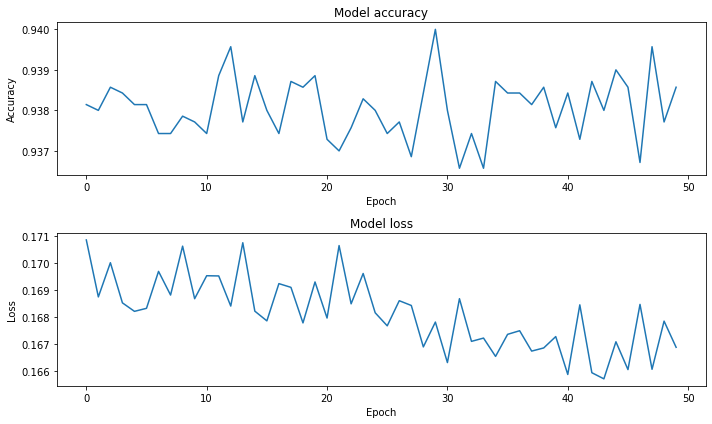

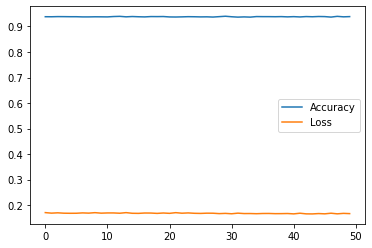

In [ ]:
# visuallizing
#accuracy
plt.figure(figsize=(10,6))
graph1=plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#loss
graph2=plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

#accuracy&loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['Accuracy', 'Loss'], loc='center right')



In [ ]:
#1(d)
# load the test dataset
dataset_test = np.loadtxt('/content/drive/MyDrive/deeplearning_HW/healthTest.csv', delimiter=',')
# split into input (X) and output (y) variables
x_test = dataset_test[:,0:4]
y_test = dataset_test[:,4]
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

NameError: ignored